### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.set_random_seed(42)
print(tf.__version__)

1.13.1


### Collect Data

In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [4]:
print(testY[0:5])

[9 2 1 1 6]


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print("trainX shape:", trainX.shape)
print("testX shape:",testX.shape)

trainX shape: (60000, 28, 28)
testX shape: (10000, 28, 28)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

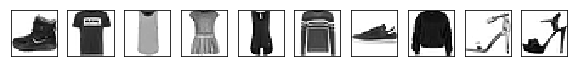

label for each of the above image:
9 0 0 3 0 2 7 2 5 5 

In [7]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

print("label for each of the above image:")
for i in range(10):
    print(trainY[i], end=' ')

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [9]:
# one-hot encode the training and testing labels
trainY = tf.keras.utils.to_categorical(trainY, 10)
testY = tf.keras.utils.to_categorical(testY, 10)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Flatten(input_shape=(28,28)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(10, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.07242958, -0.0172141 , -0.03660319, ..., -0.04176918,
         -0.01488733, -0.03945194],
        [-0.04472928, -0.0820328 ,  0.03662797, ...,  0.00359751,
         -0.01530733, -0.0632304 ],
        [-0.0149691 ,  0.06567623,  0.03532644, ..., -0.00788277,
          0.05714293,  0.01235604],
        ...,
        [-0.02548972,  0.08018591,  0.02042529, ..., -0.03719877,
          0.0571906 , -0.05991714],
        [-0.02207696, -0.05321024, -0.03393735, ...,  0.08389965,
         -0.05338563,  0.07023734],
        [ 0.05492991,  0.03209713,  0.07112564, ...,  0.06084995,
         -0.06933644,  0.03344721]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.52333164, -0.15180266, -0.30260307, -0.06977791,  0.43044686,
         -0.25397757, -0.40847284, -0.28774887, -0.34237528,  0.31167442],
        [-0.35719794,  0.19658643, -0.3188448 , -0.2540314 , -0.3697567 ,
         -0.16196969, -0.5158603 , -0.48513138, -0.00462246, -0.28986388],
   

In [13]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Execute the model using model.fit()

In [14]:
model.fit(trainX, trainY, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3496 - acc: 0.8926
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2754 - acc: 0.9018
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2205 - acc: 0.9160
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1855 - acc: 0.9326
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1660 - acc: 0.9372


In [18]:
pred = model.predict(testX)

In [19]:
print(pred[:5])

[[4.51266766e-04 1.04176998e-03 1.03775859e-02 1.01357102e-02
  2.56969035e-02 2.34445781e-01 1.74278021e-03 3.55248511e-01
  5.47741055e-02 4.93590325e-01]
 [5.09092212e-03 2.10076571e-04 5.61530650e-01 6.12437725e-05
  2.73799717e-01 4.78699803e-03 9.96858478e-02 2.08616257e-07
  1.71539187e-03 8.00281763e-04]
 [1.59397125e-02 9.41671968e-01 6.48292899e-03 1.20931447e-01
  2.65270472e-03 4.63694334e-04 3.77630293e-02 1.59963965e-03
  4.86198068e-03 3.29911709e-05]
 [5.58568537e-02 8.38289380e-01 1.38514936e-02 2.21086651e-01
  1.72274709e-02 2.72443891e-03 4.65850234e-02 1.21650100e-02
  5.61431050e-03 1.43918395e-03]
 [5.94200492e-02 1.07329190e-02 1.83283240e-01 7.16802478e-03
  8.50428343e-02 6.70713186e-03 1.16461635e-01 4.79221344e-05
  1.68414712e-02 3.97297740e-03]]


In [20]:
np.argmax(pred[0])

9

In [21]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
test_loss, test_acc = model.evaluate(testX, testY)
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 51us/sample - loss: 0.1614 - acc: 0.9380
Test loss: 0.16, test accuracy: 93.8%


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [23]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Flatten(input_shape=(28,28)))

# Add an BatchNormalization layer 
model.add(BatchNormalization())

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(10, activation='sigmoid'))

In [24]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
Total params: 9,506
Trainable params: 7,938
Non-trainable params: 1,568
_________________________________________________________________


[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [25]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [26]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3582 - acc: 0.8581
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1715 - acc: 0.9361
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1439 - acc: 0.9435
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1312 - acc: 0.9493
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1231 - acc: 0.9528


### Execute the model

In [27]:
predY = model.predict(testX)

In [28]:
print(predY[:5])

[[2.34246254e-05 4.64618206e-05 3.66044044e-03 2.64644623e-05
  2.50637531e-05 1.46134138e-01 9.65267420e-04 8.57657194e-02
  3.77222896e-03 5.04640400e-01]
 [6.64651394e-04 1.00016594e-04 8.95688415e-01 3.88681889e-04
  7.82154202e-02 3.68058681e-05 2.18800694e-01 9.53674316e-07
  4.83423471e-04 6.89923763e-05]
 [1.42812729e-03 9.86514807e-01 5.39124012e-04 6.19780123e-02
  9.03305411e-03 8.35657120e-05 2.42772698e-03 1.67489052e-05
  1.70677900e-04 1.12652779e-05]
 [3.39305401e-03 9.74074244e-01 1.54969096e-03 8.55717659e-02
  1.68947279e-02 2.99155712e-04 5.56999445e-03 7.42971897e-05
  5.62399626e-04 5.35547733e-05]
 [2.28496313e-01 3.64941359e-03 3.75311375e-01 3.46150398e-02
  2.39878893e-01 1.92539692e-02 4.74475771e-01 4.44954634e-03
  3.20627987e-02 1.02349520e-02]]


In [30]:
np.argmax(predY[0])

9

In [31]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [32]:
test_loss, test_acc = model.evaluate(testX, testY)
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1172 - acc: 0.9547
Test loss: 0.12, test accuracy: 95.5%


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [33]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Flatten(input_shape=(28,28)))

# Add an BatchNormalization layer 
model.add(BatchNormalization())

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(10, activation='sigmoid'))

In [34]:
# setting up the optimization of our weights 
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [35]:
# running the fitting
model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.2, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 6s - loss: 0.2920 - acc: 0.8716 - val_loss: 0.1670 - val_acc: 0.9343
Epoch 2/5
 - 7s - loss: 0.1601 - acc: 0.9384 - val_loss: 0.1355 - val_acc: 0.9468
Epoch 3/5
 - 6s - loss: 0.1390 - acc: 0.9465 - val_loss: 0.1190 - val_acc: 0.9533
Epoch 4/5
 - 7s - loss: 0.1262 - acc: 0.9512 - val_loss: 0.1090 - val_acc: 0.9571
Epoch 5/5
 - 6s - loss: 0.1187 - acc: 0.9538 - val_loss: 0.1029 - val_acc: 0.9596


In [36]:
predY = model.predict(testX)

In [37]:
print(predY[:5])

[[1.9937754e-05 9.9793077e-04 3.6060810e-06 3.0852258e-03 6.5779686e-04
  1.0416114e-01 2.8088689e-04 9.1257364e-02 2.2319257e-03 4.2867452e-01]
 [1.7076731e-05 2.2351742e-06 8.1740427e-01 1.7881393e-07 2.3253769e-02
  6.3081682e-03 9.0756506e-02 1.2810826e-03 2.6643276e-05 1.1920929e-07]
 [6.8444610e-03 9.9980420e-01 1.8860728e-02 4.4019222e-03 4.9114227e-04
  1.3819337e-04 1.6847253e-04 0.0000000e+00 1.4150143e-04 1.4901161e-07]
 [6.4820051e-03 9.9848580e-01 1.0795981e-02 6.7188740e-03 4.9722195e-04
  7.7942014e-04 2.5951862e-04 3.8743019e-07 2.9662251e-04 1.0132790e-06]
 [2.4714074e-01 1.4955699e-03 3.0132943e-01 1.0731369e-02 6.9070429e-02
  9.7457170e-03 4.7887471e-01 9.1305375e-03 9.8280609e-03 1.0453463e-03]]


In [39]:
np.argmax(predY[0])

9

In [40]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
test_loss, test_acc = model.evaluate(testX, testY)
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 42us/sample - loss: 0.1055 - acc: 0.9580
Test loss: 0.11, test accuracy: 95.8%


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [42]:
# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('tanh'))

# we can think of this chunk as the hidden layer    
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# we can think of this chunk as the output layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [43]:
# setting up the optimization of our weights 
sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Review model

In [44]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
__________

[array([[-0.04120455,  0.04240797,  0.0215907 , ...,  0.00849964,
          0.02471569, -0.00324752],
        [ 0.07545625, -0.01055136, -0.01443462, ...,  0.06167531,
          0.00573019, -0.04984713],
        [-0.06864479,  0.05955055, -0.0502913 , ..., -0.05240409,
         -0.03258058, -0.01517817],
        ...,
        [-0.07830998,  0.07357807, -0.00642342, ..., -0.03559029,
          0.0057878 , -0.04576533],
        [-0.0611282 , -0.02540643,  0.04570118, ..., -0.04515198,
          0.06731704, -0.05760349],
        [-0.05877699,  0.0466857 ,  0.07206866, ..., -0.00632183,
          0.01234698,  0.05151397]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

### Run the model

In [52]:
# running the fitting
model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.2, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 9s - loss: 0.0723 - acc: 0.9726 - val_loss: 0.0663 - val_acc: 0.9733
Epoch 2/5
 - 10s - loss: 0.0688 - acc: 0.9739 - val_loss: 0.0607 - val_acc: 0.9763
Epoch 3/5
 - 10s - loss: 0.0670 - acc: 0.9745 - val_loss: 0.0621 - val_acc: 0.9761
Epoch 4/5
 - 10s - loss: 0.0641 - acc: 0.9757 - val_loss: 0.0594 - val_acc: 0.9769
Epoch 5/5
 - 10s - loss: 0.0631 - acc: 0.9759 - val_loss: 0.0679 - val_acc: 0.9742


In [46]:
predictions = model.predict(testX)

In [47]:
predictions[0]

array([2.02480340e-04, 1.21778845e-04, 6.96166011e-04, 5.22965973e-04,
       2.47177260e-04, 1.90412663e-02, 3.93057242e-03, 1.16786063e-02,
       7.22376746e-04, 9.62836623e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [53]:
test_loss, test_acc = model.evaluate(testX, testY)
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0721 - acc: 0.9719
Test loss: 0.07, test accuracy: 97.2%
